#### Sinjini Ghosh

### Aim: To implement an image color detector which detects all the colors in an image 

##### Importing the necessary libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2 # OpenCv
from collections import Counter 

### Understanding the basic functions that we can perform on images using openCV. 
We will be using these functions in the program

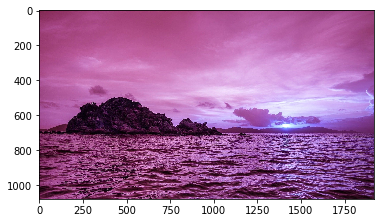

In [2]:
# Reading an image and then displaying it
 
image = cv2.imread("purple ocean.jpg")
plt.imshow(image)

# the image in in BGR format by default

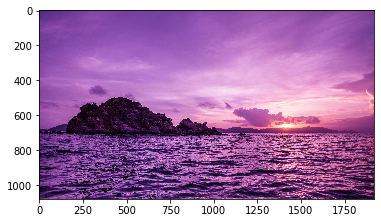

In [3]:
# Converting the color order of image from BGR to RGB 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### The main code

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
# This function converts the color shade from RGB format to HEX format

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
# To read the image from the image path and return it

def get_colors(image, num_of_colors):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # Resizing the image using the .resize method of OpenCV (changing the dimensions)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    # Reshaping the image to fit the requirements of KMeans   
    
    clf = KMeans(n_clusters = num_of_colors)  
    # K-Means classifier
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    # Creating a sorted dictionary of color percentages
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    # Iterating through the keys of the dictionary
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys() ]
    # Again, changing the colors from RGB to hex notation
    
    # Plotting a pie chart to show the proportion of each color present in the image
    plt.figure(figsize = (10, 10))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.show()

Enter the image path: purple ocean.jpg
Enter the number of colors you want to identify in the image: 10


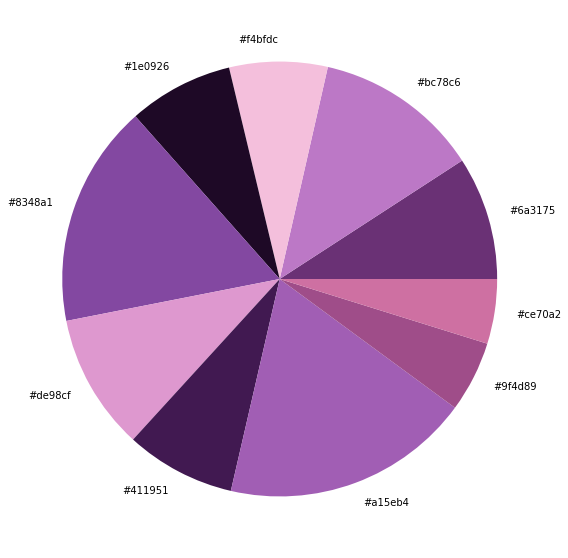

In [5]:
img_path = input("Enter the image path: ")
num_colors = int(input("Enter the number of colors you want to identify in the image: "))

image = get_image(img_path)

get_colors(image, num_colors)